# CNN MNIST Prediction

In [26]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()


# Normalize
x_train = x_train.reshape(-1, 28, 28, 1) / 255.0
x_test = x_test.reshape(-1, 28, 28, 1) / 255.0


# One-hot encode labels
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [27]:
from tensorflow.keras.layers import Dropout
# from tensorflow.python.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Build model
model = Sequential([

    #CNN Layer 1
    Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D(pool_size=(2,2)),

    #CNN Layer 2
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(pool_size=(2,2)),

    # Dense layers
    Flatten(input_shape=(28, 28)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train_cat, epochs=8, validation_split=0.2, batch_size=128)

# Evaluate
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print("Test Accuracy:", round(test_acc * 100, 2), "%")


Epoch 1/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.7152 - loss: 0.8633 - val_accuracy: 0.9716 - val_loss: 0.0992
Epoch 2/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9385 - loss: 0.2011 - val_accuracy: 0.9794 - val_loss: 0.0661
Epoch 3/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9571 - loss: 0.1420 - val_accuracy: 0.9827 - val_loss: 0.0584
Epoch 4/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - accuracy: 0.9639 - loss: 0.1193 - val_accuracy: 0.9863 - val_loss: 0.0481
Epoch 5/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9694 - loss: 0.1017 - val_accuracy: 0.9842 - val_loss: 0.0529
Epoch 6/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.9732 - loss: 0.0843 - val_accuracy: 0.9869 - val_loss: 0.0442
Epoch 7/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 15ms/step - accuracy: 0.9755 - loss: 0.0778 - val_accuracy: 0.9887 - val_loss: 0.0401
Epoch 8/8
375/375 ━━━━━━━━━━━━━━━━━━━━ 6s 16ms/step - accuracy: 0.9778 - loss: 0.0725 - val_accuracy: 0.

### Inputting real world Images

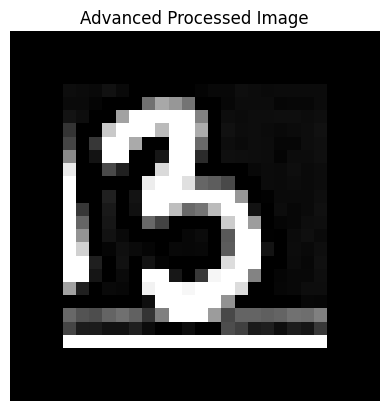

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Predicted Digit: 3
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Digit 0: 0.00% confidence
Digit 1: 0.00% confidence
Digit 2: 0.05% confidence
Digit 3: 99.64% confidence
Digit 4: 0.03% confidence
Digit 5: 0.26% confidence
Digit 6: 0.01% confidence
Digit 7: 0.00% confidence
Digit 8: 0.00% confidence
Digit 9: 0.00% confidence


In [36]:
from matplotlib import pyplot as plt
from PIL import ImageEnhance, ImageFilter, Image, ImageOps
import numpy as np


def advanced_preprocess(path):
    img = Image.open(path).convert("L")
    img = ImageOps.invert(img)

    # Enhance contrast
    img = ImageEnhance.Contrast(img).enhance(2.0)

    # Resize with high-quality resampling
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)

    # Center in a 28x28 canvas
    new_img = Image.new("L", (28, 28), 0)
    new_img.paste(img, ((28 - img.size[0]) // 2, (28 - img.size[1]) // 2))

    # Sharpen
    new_img = new_img.filter(ImageFilter.SHARPEN)

    # Display
    plt.imshow(new_img, cmap='gray')
    plt.title("Advanced Processed Image")
    plt.axis("off")
    plt.show()

    # Normalize and reshape
    arr = np.array(new_img).astype("float32") / 255.0
    arr = arr.reshape(1, 28, 28)
    return arr

# Use it
img_path = "sampleData/three2.png"
advanced_img = advanced_preprocess(img_path)

pred = model.predict(advanced_img)
print("Predicted Digit:", np.argmax(pred))

# Predict probabilities for each class
probs = model.predict(advanced_img)[0]  # shape: (10,)

# Print each class's confidence
for i, prob in enumerate(probs):
    print(f"Digit {i}: {prob * 100:.2f}% confidence")



In [39]:
model.save("mnist_cnn_model.keras")
print(" Model saved")


 Model saved
